<a href="https://colab.research.google.com/github/marlin97/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd

In [2]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names #to verify data and col names

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

In [0]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
#reading in the dataframe setting column names
df = pd.read_csv(data_url, header=None, names=['patient_age', 'year_of_operation', 'pos_aux_nodes_detected', 'survival_status'])

In [4]:
#checking data validity
#the shape (306 rows by 4 cols) is correct 
print(df.describe())
print(df.shape)
df.head(10)

       patient_age  year_of_operation  pos_aux_nodes_detected  survival_status
count   306.000000         306.000000              306.000000       306.000000
mean     52.457516          62.852941                4.026144         1.264706
std      10.803452           3.249405                7.189654         0.441899
min      30.000000          58.000000                0.000000         1.000000
25%      44.000000          60.000000                0.000000         1.000000
50%      52.000000          63.000000                1.000000         1.000000
75%      60.750000          65.750000                4.000000         2.000000
max      83.000000          69.000000               52.000000         2.000000
(306, 4)


,patient_age,year_of_operation,pos_aux_nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [5]:
#checking for NaN values
df.isna().sum()

patient_age               0
year_of_operation         0
pos_aux_nodes_detected    0
survival_status           0
dtype: int64

In [0]:
#since surviving over 5 yr is already encoded as 1, we only need to change 2 to 0
replace_class_att = {'survival_status':{2:0}}
df.replace(replace_class_att, inplace=True)

In [7]:
print(df['survival_status'].describe())
print('------------------------------')
print(df['survival_status'].nunique())
print('------------------------------')
print(df['survival_status'].isna().sum())
df['survival_status'].head(10)

count    306.000000
mean       0.735294
std        0.441899
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: survival_status, dtype: float64
------------------------------
2
------------------------------
0


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    0
9    1
Name: survival_status, dtype: int64

In [8]:
#first 5
df.head()

,patient_age,year_of_operation,pos_aux_nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
import matplotlib.pyplot as plt

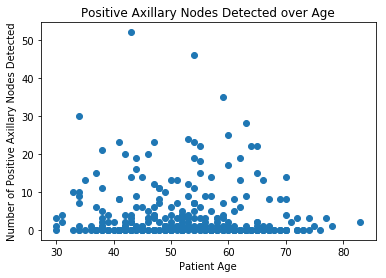

In [10]:
plt.scatter(x=df['patient_age'], y=df['pos_aux_nodes_detected'])
plt.title('Positive Axillary Nodes Detected over Age')
plt.xlabel('Patient Age')
plt.ylabel('Number of Positive Axillary Nodes Detected');

In [0]:
age_bins = pd.cut(df['patient_age'], 5)
op_yr_bins = pd.cut(df['year_of_operation'], 5)
num_nodes_bins = pd.cut(df['pos_aux_nodes_detected'], 5)

In [0]:
# 0 = died within 5 yrs | 1 = survived over 5 yrs
# generating 3 crosstabs to compare all variabled to survial
year_survive_cross = pd.crosstab(op_yr_bins, df['survival_status'], normalize='index')
age_survive_cross = pd.crosstab(age_bins, df['survival_status'], normalize='index')
nodenum_survive_cross = pd.crosstab(num_nodes_bins, df['survival_status'], normalize='index')

In [13]:
year_survive_cross

survival_status,0,1
year_of_operation,,
"(57.989, 60.2]",0.274725,0.725275
"(60.2, 62.4]",0.204082,0.795918
"(62.4, 64.6]",0.262295,0.737705
"(64.6, 66.8]",0.339286,0.660714
"(66.8, 69.0]",0.224490,0.775510


In [14]:
age_survive_cross

survival_status,0,1
patient_age,,
"(29.947, 40.6]",0.093023,0.906977
"(40.6, 51.2]",0.313131,0.686869
"(51.2, 61.8]",0.281250,0.718750
"(61.8, 72.4]",0.271186,0.728814
"(72.4, 83.0]",0.333333,0.666667


In [15]:
nodenum_survive_cross

survival_status,0,1
pos_aux_nodes_detected,,
"(-0.052, 10.4]",0.218045,0.781955
"(10.4, 20.8]",0.576923,0.423077
"(20.8, 31.2]",0.545455,0.454545
"(31.2, 41.6]",1.000000,0.000000
"(41.6, 52.0]",0.500000,0.500000


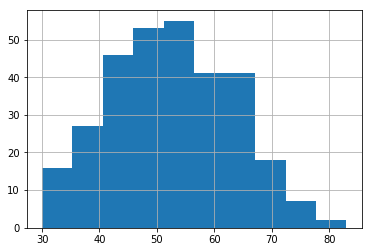

In [16]:
df['patient_age'].hist();
#patient age forms a normal distribution

Text(0, 0.5, 'Survival Percentage (x100)')

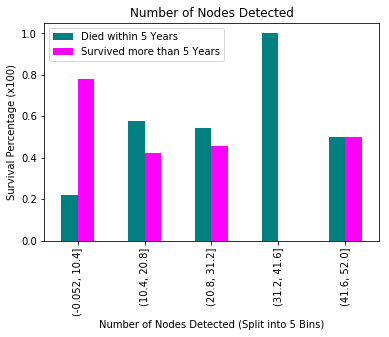

In [17]:
nodenum_survive_cross.plot.bar(color=['teal', 'magenta'])
plt.title('Number of Nodes Detected')
labels = ['Died within 5 Years', 'Survived more than 5 Years']
plt.legend(labels)
plt.xlabel("Number of Nodes Detected (Split into 5 Bins)")
plt.ylabel("Survival Percentage (x100)")

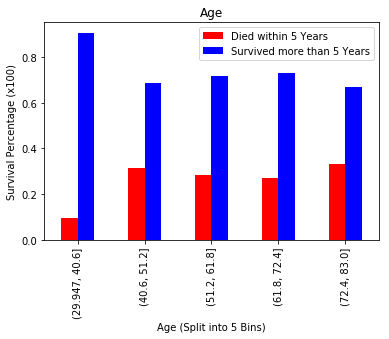

In [18]:
age_survive_cross.plot.bar(color=['red', 'blue'])
plt.title('Age')
labels = ['Died within 5 Years', 'Survived more than 5 Years']
plt.legend(labels)
plt.xlabel("Age (Split into 5 Bins)")
plt.ylabel("Survival Percentage (x100)");

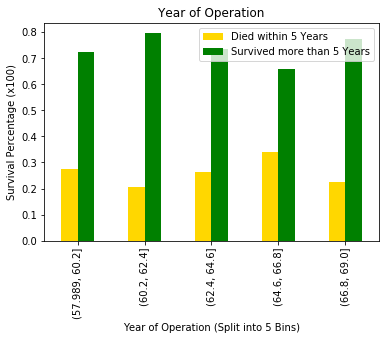

In [19]:
year_survive_cross.plot.bar(color=['gold', 'green'])
plt.title('Year of Operation')
labels = ['Died within 5 Years', 'Survived more than 5 Years']
plt.legend(labels)
plt.xlabel('Year of Operation (Split into 5 Bins)')
plt.ylabel("Survival Percentage (x100)");

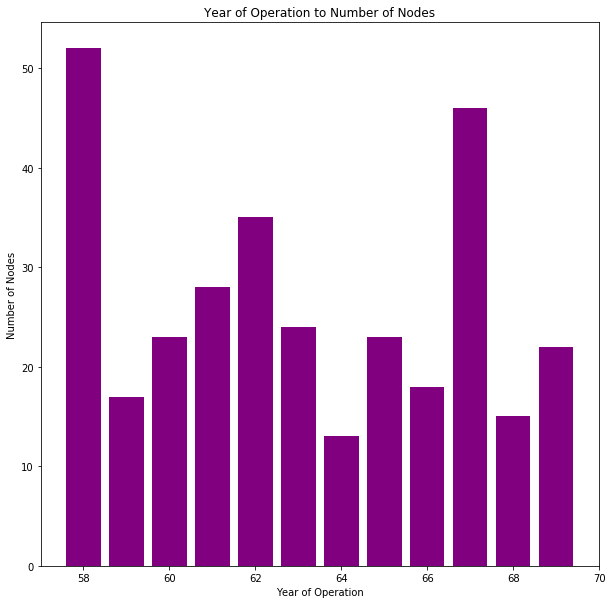

In [20]:
plt.figure(figsize=(10,10))
plt.bar(df['year_of_operation'], df['pos_aux_nodes_detected'], color='purple')
plt.title('Year of Operation to Number of Nodes')
plt.xlabel('Year of Operation')
plt.ylabel('Number of Nodes');

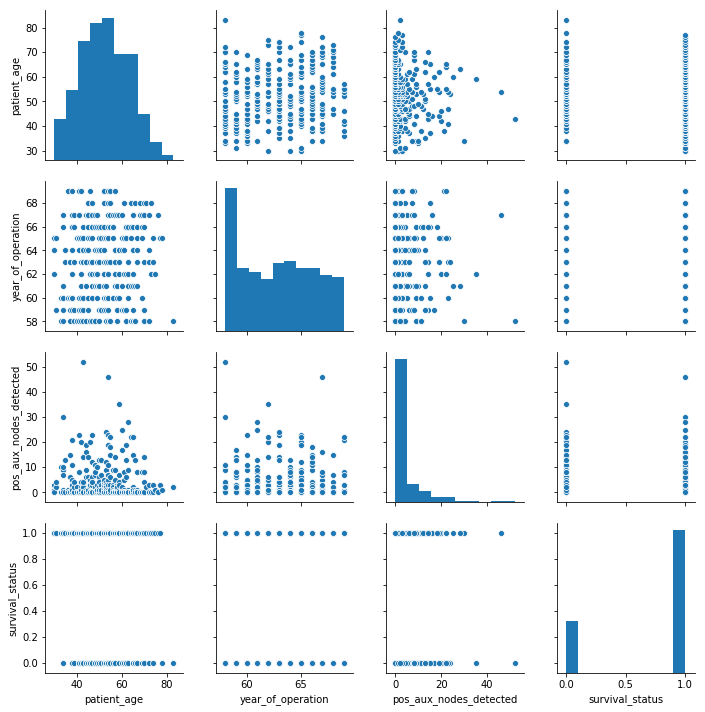

In [21]:
import seaborn as sns
sns.pairplot(df)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### Year of opperation seems to have a small, but present, positive relationship. According to the pivot table compairing the operation year to survival, the percent of people surviving goes up as the years do. This is most likley due to advancing medical technology, but that is just speculation. 



### As the number of nodes increases, survival seems to go down. This is a negative relationship because as one thing goes up (number of nodes), the ammount of people who survived over 5 years, goes down. This is also called an inverse relationship. Age also seems to have a negative relationship with survival. As age goes up, the chance of surviving more than 5 years seems to decrease (especially after 40 Years). 



### It is possible that the year of the operation,  and the number of nodes detected are related. This may be due to the advancment in technology to detect cancer as medical science and radiology develeope and become more advanced. Overall, I do find it difficult to draw hard conclusion from this data, as the results are not that consistant. 